In [ ]:
# Face Detection : 사진에서 얼굴을 찾아서 영역 표시
# Face Recognition : 감지된 얼굴 데이터 기반으로 동일한 인물 인식

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

Hello Google Drive!

In [2]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566164 sha256=96eeee63e41d0955fb94a7944612efeb8031daaa6f64a4df5ae5531bdcff692d
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [3]:
import cv2, os
import face_recognition as fr
from IPython.display import Image, display
from matplotlib import pyplot as plt

In [45]:
path = '/content/drive/MyDrive/test.jpg'

In [46]:
Image = fr.load_image_file(path)
face_locations = fr.face_locations(Image)

In [47]:
for(top, right, bottom, left) in face_locations:
  cv2.rectangle(Image, (left, top), (right, bottom), (0, 0, 255), 3)

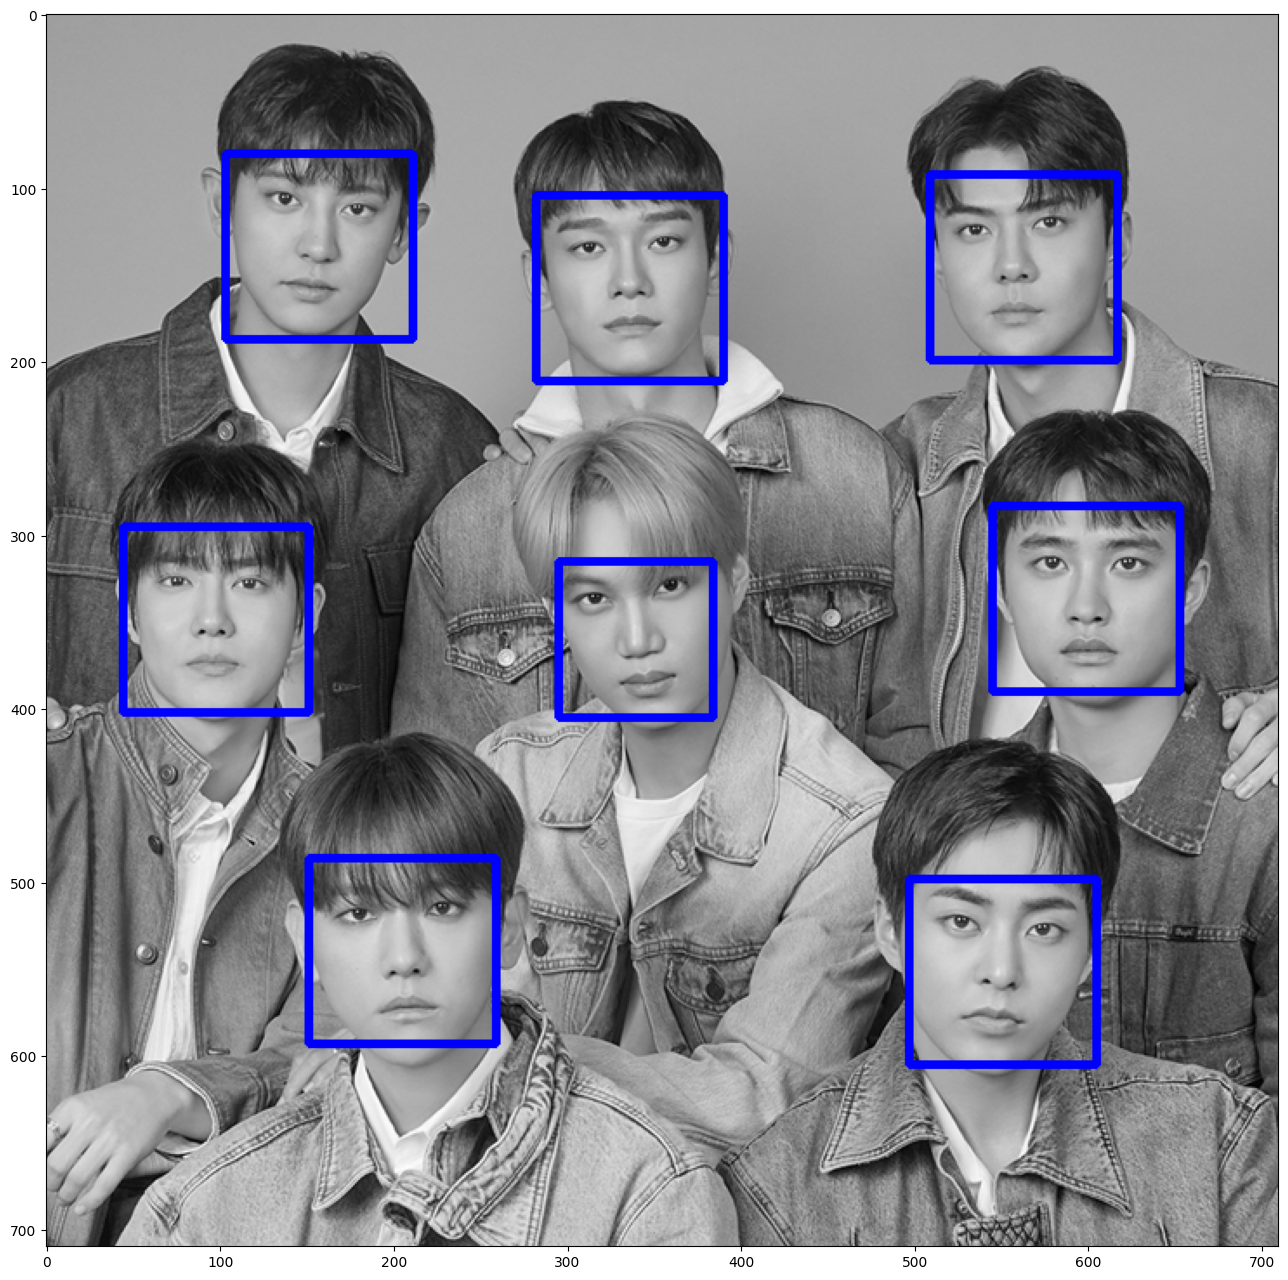

In [48]:
# 이미지 버퍼 출력
plt.rcParams['figure.figsize'] = [16, 16]
plt.imshow(Image)
plt.show()

In [8]:
plt.rcParams['figure.figsize'] = (1, 1)

#이미지 파일 로드하여 리스트 생성
image_list = []
image_list.append(fr.load_image_file('/content/drive/MyDrive/kms.jpg'))
image_list.append(fr.load_image_file('/content/drive/MyDrive/ksc1.jpg'))
image_list.append(fr.load_image_file('/content/drive/MyDrive/dks.jpg'))
image_list.append(fr.load_image_file('/content/drive/MyDrive/ksc2.jpg'))

In [11]:
#얼굴을 인식하여 감지된 부분을 잘라낸 다음 리스트에 저장
face_list = []
for person in image_list:
  # 각 사람에 대한 얼굴 위치 계산
  face_locations = fr.face_locations(person)

  if face_locations:  # 얼굴이 감지되었는지 확인
    top, right, bottom, left = face_locations[0]  # 이미지당 하나의 얼굴을 가정
    face_image = person[top:bottom, left:right]
    face_list.append(face_image)  # 잘린 얼굴 이미지만 추가

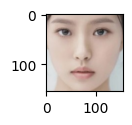

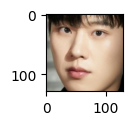

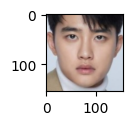

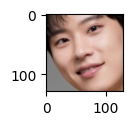

In [12]:
# 리스트에 저장된 얼굴들 출력
for face in face_list:
  plt.imshow(face)
  plt.show()

In [30]:
import face_recognition as fr
import numpy as np

unknown_person = fr.load_image_file('/content/drive/MyDrive/ksc3.jpg')

unknown_face_locations = fr.face_locations(unknown_person)

if unknown_face_locations:
  top, right, bottom, left = unknown_face_locations[0]
  unknown_face = np.array(unknown_person[top:bottom, left:right])
else:
  print("No faces found in the image.")

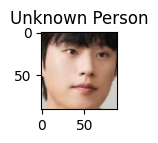

In [31]:
plt.title("Unknown Person")
plt.imshow(unknown_face)
plt.show()

<class 'numpy.ndarray'>


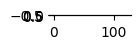

In [33]:
print(type(unknown_face))
enc_unknown_face = fr.face_encodings(unknown_face)

plt.imshow(enc_unknown_face)
plt.show()

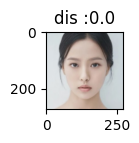

불일치



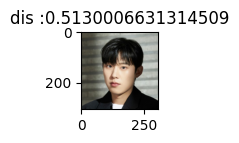

일치



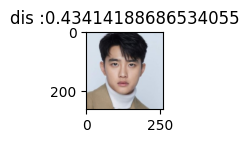

불일치



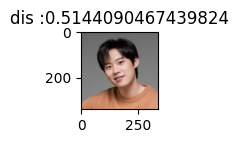

일치



In [36]:
# 등록된 얼굴리스트 비교
for face in image_list:
  face = np.array(face)
  enc_known_face = fr.face_encodings(face)

  distance = fr.face_distance(enc_known_face, enc_unknown_face[0])

  plt.title("dis :" + str(distance[0]))
  plt.imshow(face)
  plt.show()

  if distance >= 0.5:
    print("일치")
  else:
    print("불일치")
  print()